In [52]:
import numpy as np
from matplotlib import pyplot as plt

In [140]:
t = np.linspace(0, 1, 11)
x = np.linspace(0, 1, 11)

n_t, n_x = len(t), len(x)


def trd(a, b, c, n):
    A = np.zeros((n, n))
    for i in range(n):
        if i == 0:
            A[i][i] = b
            A[i][i+1] = c
        elif i == n-1:
            A[i][i-1] = a
            A[i][i] = b
        else:
            A[i][i-1] = a
            A[i][i] = b
            A[i][i+1] = c
    return A

def bw_euler(x, t, a = 0.024):
    dx, dt = 1/(len(x)-1), 1/(len(t)-1)
    
    u0 = 2*(x**4) - 2*np.exp(x)
    b1 = -3*(t**3) - 2
    b2  = 2 - 3*(t**3) + 3*(t**2) - 2*np.exp(1)

    
    td = trd(1,-2, 1, n_t-2)
    td *= -(a*dt)/(dx**2)
    td += np.eye(n_t-2)
    u_ = np.zeros((n_t, n_x))
    v  = np.zeros(n_t - 2) 
    u_[0] = u0
    u_[-1][0], u_[-1][-1] = b1[-1], b2[-1]
    for i in range(1, n_t):
        u_[i][0], u_[i][-1] = b1[i], b2[i]
        v = dt * f(x[1:-1], np.array([t[i]for k in range((n_t)-2)])) + u_[i-1][1:-1]
        u_[i][1:-1] = np.linalg.solve(td,v)
        
    return u_
    
    


def U(t, x = .5):
    return 2 * (x**4) - 3 * (t**3) + 3*(t**2)*x - 2*np.exp(x)

def f(x, t, a = 0.024): 
    return -9 * (t**2) + 6*t*x - a*(24*(x**2) - 2*np.exp(x))



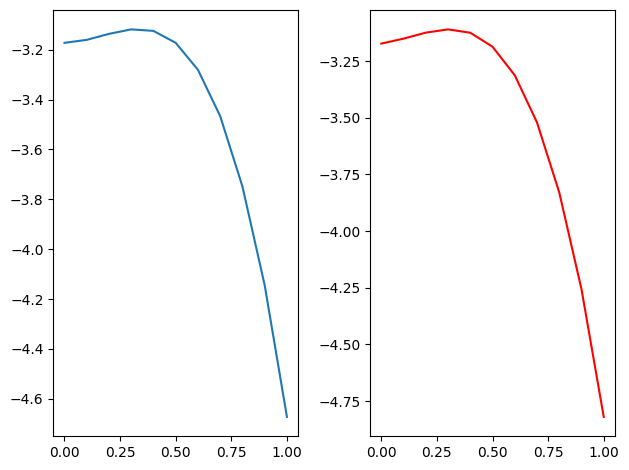

In [142]:
fig, axs = plt.subplots(ncols = 2, nrows = 1)

X, Y = np.meshgrid(t, x)
y1 = bw_euler(x,t)

z = [y1[i][5] for i in range(n_t)]

axs[0].plot(t, U(t))
axs[1].plot(t, z, 'r')
#axs[1].plot_surface(x, t, bw_euler(x,t))

fig.tight_layout()
plt.show()


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.31909896e-01 -5.58961154e-02 -1.24031793e-02
  -7.71266219e-03 -9.78310957e-03 -1.47440014e-02 -3.07686109e-02
  -1.12129340e-01 -5.85332755e-01  0.00000000e+00]
 [ 0.00000000e+00 -5.65143916e-01 -1.27714676e-01 -2.66498019e-02
  -9.56836018e-03 -1.23438655e-02 -2.54166750e-02 -7.00893369e-02
  -2.53231931e-01 -9.86439091e-01  0.00000000e+00]
 [ 0.00000000e+00 -7.37708518e-01 -2.00554635e-01 -4.15209462e-02
  -6.57286392e-03 -8.76841923e-03 -3.31937696e-02 -1.14654060e-01
  -3.93934268e-01 -1.25911132e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.77252725e-01 -2.68558072e-01 -5.53314357e-02
   7.28989150e-04  8.89297696e-05 -3.82729966e-02 -1.59928748e-01
  -5.19862607e-01 -1.44163499e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.00526888e+00 -3.31056846e-01 -6.68767315e-02
   1.20754785e-02  

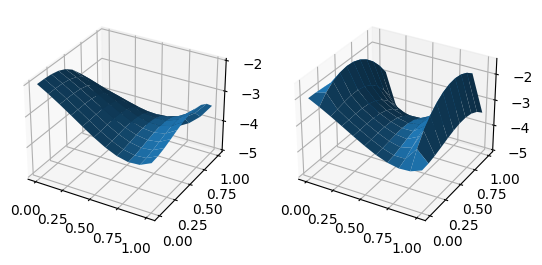

In [178]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(x, t)
y1 = bw_euler(x,t)

print(U(Y, X)-y1)


axs[0].plot_surface(X, Y, U(Y, X))
axs[1].plot_surface(X, Y, y1)

plt.show()